# Лабораторная работа "Построение эллипса Петунина"


In [89]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline
np.random.seed(20)

## Создание набора точек

Будем генерировать точки случайным образом

### Обозначим границы области для генерации точек и количество точек

In [90]:
x_limits = [-10,10]
y_limits = [-5,5]
N = 100


### Используем функцию для создания набора данных

In [91]:
def random_data(x_limits, y_limits,N):
    """
    Функция создает массив точек на плоскости в заданных ограничениях 
    с равномерным распределением
    ограничения (x_limits, y_limits) заданы в виде (x_min, x_max)
    Размер выходного массива (2,N)
    """
    return np.vstack((np.random.uniform(x_limits[0],x_limits[1], N),
            np.random.uniform(y_limits[0],y_limits[1], N)))

In [92]:
data = random_data(x_limits, y_limits, N)

### Рисунок полученных точек

In [93]:
def first_pic(data, x_limits, y_limits, size=7, title = ""):
    """
    Рисует только полученные точки
    """
    figsize = np.array((abs(x_limits[0] - x_limits[1]), abs(y_limits[0] - y_limits[1])))
    figsize = figsize*(size/np.max(figsize))
    fig, ax = plt.subplots(figsize = figsize)
    ax.set_title(title)
    ax.set_xlim(*x_limits)
    ax.set_ylim(*y_limits)
    ax.axis("equal")
    ax.scatter(data[0],data[1])
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    return fig

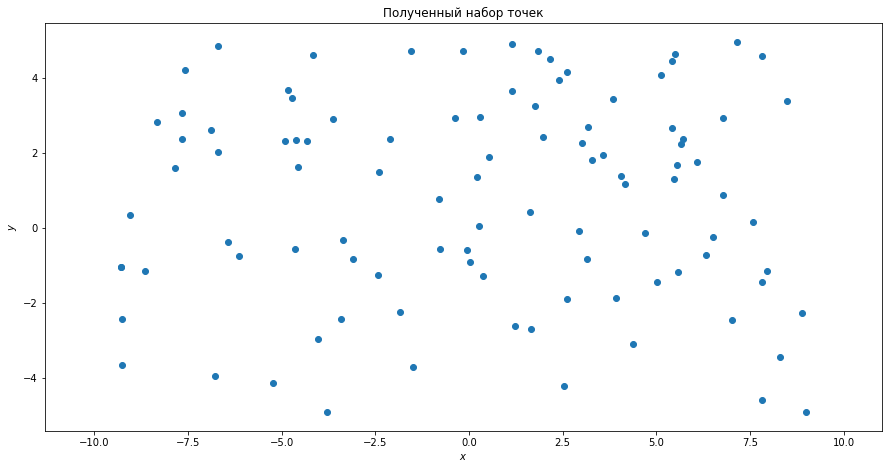

In [94]:
_= first_pic(data, x_limits, y_limits,size = 15, title= "Полученный набор точек")

## Определение 2 наиболее отдаленных точек

Найдем 2 наиболее отдаленные точки и будем считать, что главная ось эллипсов Петунина лежит на прямой, что соединяет найденные точки.

In [95]:
def distance(dot1, dot2):
    """
    функция расстояния между точками
    """
    return np.sqrt(np.sum((dot1- dot2)**2))


In [96]:
def max_distance(data):
    """
    Функция ищет индексы точек, между которыми максимальное расстояние
    """
    max_val = 0
    index = [0,0]
    # транспонируем данные для удобного обращения к точкам
    for in1, dot1 in enumerate(data.T):
        for in2, dot2 in enumerate(data.T):
            if distance(dot1, dot2)> max_val:
                max_val = distance(dot1, dot2)
                index = [in1, in2]
    # сортируем индексы по х
    return sorted(index, key = lambda ind: data[0,ind])

Запишем индексы точек между которыми наибольшее растояние

In [97]:
index_max = max_distance(data)

### Нарисуем полученный отрезок, что соединяет 2 наиболее отдаленные точки

In [98]:
def second_pic(data, x_limits, y_limits, index_max,  size =7, title = ""):
    """
    Рисует полученные точки и отрезок, котрый соединяет самые отдаленные точки
    """
    fig= first_pic(data, x_limits, y_limits, size , title)
    ax = fig.axes[0]
    ax.plot([data[0,index_max[0]], data[0,index_max[1]]], [data[1,index_max[0]], data[1,index_max[1]]])
    return fig

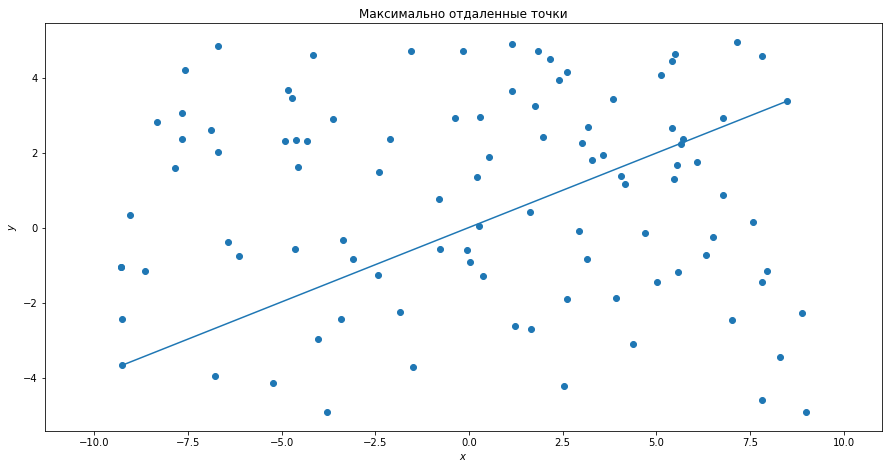

In [99]:
_ = second_pic(data, x_limits, y_limits, index_max, size=15, title= "Максимально отдаленные точки")

## Разворот точек

Для удобства построения эллипсов и поиска точек, что образуют максимальные перпендикуляры к проведенному отрезку, проведем разворот точек так, чтобы полученный отрезок был горизонтальным.

In [100]:
def rotate_point (point, center, angle):
    """
    Поворот точек point (хранятся в виде (2,N)) относительно center на угол angle
    angle в радианах и angle лежит в (-pi/2 , pi/2)
    """
    ox = (point[0] - center[0])*np.cos(angle) - (point[1]- center[1])*np.sin(angle) + center[0]
    oy = (point[0] - center[0])*np.sin(angle) + (point[1]- center[1])*np.cos(angle) + center[1]
    return np.vstack((ox,oy))

In [101]:
def find_angle(data, index_max):
    """
    Функция ищет угол наклона [-pi/2, pi/2] отрезка порожденного индексами index_max
    """
    return np.arctan((data[1,index_max[1]] -data[1,index_max[0]])/ (data[0,index_max[1]] -data[0,index_max[0]]))

Находим угол, который образует отрезок.

In [102]:
angle = find_angle(data, index_max)

Делаем поворот на найденный угол в обратную сторону.

### И в итоге получаем развернутый набор данных (*rdata*)

In [103]:
# умножаем угол на -1
rdata = rotate_point(data, data[:,index_max[0]], -1*angle)

### Поиск перпендикуляров

Ищем точки, с максимальным и минимальным значением по оси *y*. Проводим из этих точек перпендикуляры на отрезок.

In [104]:
def vertical_segments(rdata):
    """
    Функция находит индексы точек с имнимальным и максимальным значениями по оси y 
    """
    return [np.argmin(rdata,axis=1)[1], np.argmax(rdata,axis=1)[1]]

Находим индексы точек из которых проведем перпендикуляры.

In [105]:
v_index = vertical_segments(rdata)

Строим перпендикуляры

In [106]:
def vertical_perpendiculars(rdata, index_max, v_index):
    """
    Функция возвращает 2 отрезка, перпендикуляры максимальной длины, к горизонтальному отрезку,
    который задан индексами index_max
    """
    seg1 = np.array([rdata.T[v_index[0]], [rdata.T[v_index[0],0], rdata.T[index_max[0],1]]]).T
    seg2 = np.array([rdata.T[v_index[1]], [rdata.T[v_index[1],0], rdata.T[index_max[0],1]]]).T
    return seg1, seg2

In [107]:
segments = np.array(vertical_perpendiculars(rdata, index_max, v_index))

### Рисунок повернутых точек и перпендикуляров

В данном случае границы рисунка подстраиваются самостоятельно под расположение точек.

In [108]:
def third_pic(rdata, index_max,v_index, segments, size = 7, title= ""):
    """
    Повернутый график с максимальными вертикальными отрезками
    """
    new_y_limits = rdata[1,v_index[0]]*1.1, rdata[1,v_index[1]]*1.1
    new_x_limits = rdata[0,index_max[0]]*1.1, rdata[0,index_max[1]]*1.1
    fig = second_pic(rdata, new_x_limits, new_y_limits,index_max, size, title )
    ax = fig.axes[0]
    ax.plot(segments[0][0], segments[0][1], color ='red')
    ax.plot(segments[1][0], segments[1][1], color ='red')
    return fig

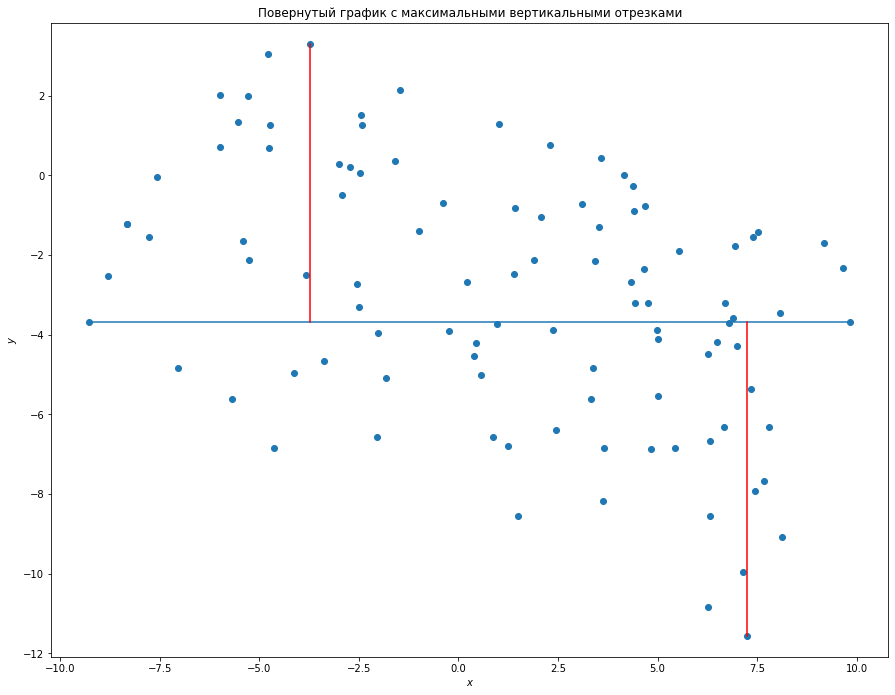

In [109]:
_= third_pic(rdata,index_max,v_index, segments, size = 15,title=
          "Повернутый график с максимальными вертикальными отрезками")

## Сжатие\Растяжение данных

Сожмем\растянем данные по оси *x* относительно левой точки горизонтального отрезка. Коэффициент сжатия\растяжения выбирается так, чтобы сумма длин вертикальных перпендикуляров была равна длине горизонтального отрезка.

In [110]:
def compression_ratio(rdata, index_max, v_index):
    """
    находит коэффициент сжатия/растяжения по x для получения квадрата,
    а именно равенства отрезков, что были получены из index_max, v_index
    """
    x_length = np.abs(rdata[0,index_max[1]] - rdata[0,index_max[0]])
    y_length = np.abs(rdata[1,v_index[1]] - rdata[1,v_index[0]])
    return y_length/ x_length

Находим коефициент растяжения\сжатия

In [111]:
koef = compression_ratio(rdata, index_max, v_index)

In [112]:
def make_square_data(rdata, segments, koef):
    """
    Функция изменяет данные, сжимает или растягивает по координате x для получения квадрата,
    а именно равенства отрезков, что были получены из index_max, v_index
    """
    s_rdata = rdata.copy()
    s_rdata[0]= s_rdata[0]* koef
    s_segments= segments.copy()
    for i in range(len(s_segments)):
        s_segments[i][0]*= koef
    return s_rdata, s_segments

### Получем набор сжатых данных и новые точки перпендикуляров

In [113]:
s_rdata, s_segments = make_square_data(rdata, segments, koef)

### Рисунок сжатых данных

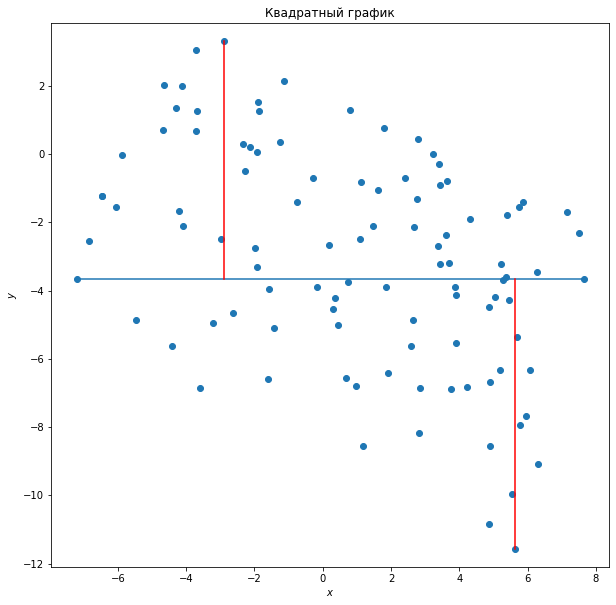

In [114]:
_ = third_pic(s_rdata,index_max,v_index, s_segments, size =10, title="Квадратный график")

## Проведем концентричексие окружности

Проведем концентрические окружности через каждую точку с центром в центре масс сжатых данных. Также будем сохранять кол-во точек, что попали внутрь концентричекой окружности(включая границу)

In [115]:
def mass_centr(data):
    """
    Функция для вычисления центра масс данных
    """
    return np.sum(data, axis =1)/ data.shape[1]

In [116]:
class MyCircle:
    """
    класс круга, который хранит количество точек, что попали внутрь (включая границу). Для этого передается data
    """
    def __init__(self, xy, radius, data):
        self.xy = xy
        self.radius = radius
        self.count = self._count_of_inside_dots(data)
    def _count_of_inside_dots(self,data):
        """
        функция делает перефор точек data и возвращает кол-во попавших внутрь окружности (включая границу)
        """
        # транспонируем для удобства вычисления расстояния
        count =0
        for dot in data.T:
            if distance(dot, self.xy) <= self.radius:
                count+=1
        return count

    def __str__(self):
        return f"MyCircle xy: {self.xy}, radius: {self.radius},count: {self.count}"

### Создадим список концентрических окружностей

In [117]:
mycircle_list = []
new_centr = mass_centr(s_rdata)
for dot in s_rdata.T:
    mycircle_list.append(MyCircle(new_centr, distance(dot, new_centr), s_rdata))


Выведем несколько окружностей для наглядности

In [118]:
print(*mycircle_list[:5], sep='\n')

MyCircle xy: [ 1.01641257 -3.09770831], radius: 2.4954831133193918,count: 17
MyCircle xy: [ 1.01641257 -3.09770831], radius: 6.746339462095179,count: 83
MyCircle xy: [ 1.01641257 -3.09770831], radius: 6.787087705497341,count: 84
MyCircle xy: [ 1.01641257 -3.09770831], radius: 5.2876220473464235,count: 67
MyCircle xy: [ 1.01641257 -3.09770831], radius: 7.710954228055676,count: 92


### Рисунок окружностей

Для создания рисунка используется библиотека *matplotlib* и класс *matplotlib.patches.Circle*

In [119]:
def fourth_pic(s_rdata, index_max,v_index, segments, centr, mycircle_list,size = 7, title= ""):
    """
    Рисунок для кваратной области с концентрическими окружностями
    """
    fig = third_pic(s_rdata, index_max, v_index, segments, size = size, title = title)
    ax = fig.axes[0]
    ax.scatter(centr[0], centr[1], color = "y")
    for circle in mycircle_list:
        ax.add_patch(ptc.Circle(circle.xy,circle.radius, fill= False, color ="green"))
    return fig

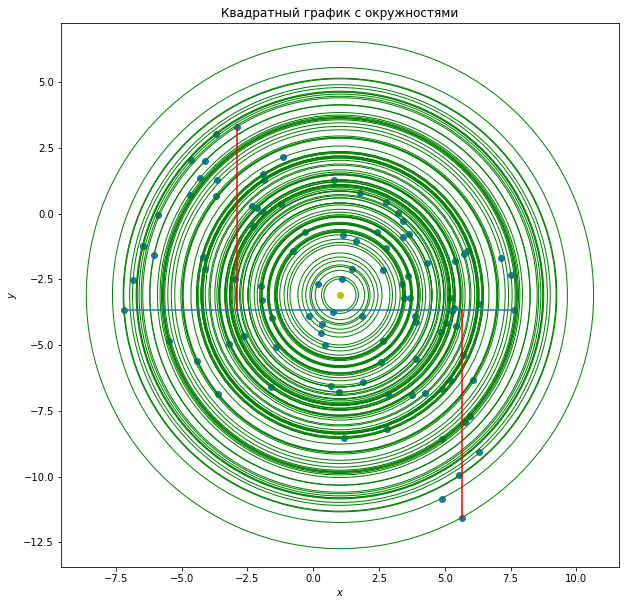

In [120]:
_= fourth_pic(s_rdata,index_max,v_index, s_segments, new_centr, mycircle_list, size = 10,
              title="Квадратный график с окружностями")

## Создание эллипса Петунина

Теперь вернем данные к виду из предыдущих шагов (обернем операцию сжатия). Получим просто повернутый набор данных. Также растянем концентричекие окружности( получим эллипсы):
- будет перенесен центр
- главной осью полученного эллипса будет диаметр окружности умноженный на коэф. растяжения
- угол полученного эллипса равен нулю (угол между осью *x* и главной осью эллипса).
- количество точек, что было внутри окружности, будет равно кол-ву точек, что попали внутрь эллипса.

In [121]:
class MyEllipse:
    """
    Класс эллипсов с кол-вом точек, что попали внутрь (включая границу)
    """
    def __init__(self, xy, width, height, angle=0, count=0):
        self.xy = xy
        self.width = width
        self.height = height
        self.angle = angle
        self.count = count
    def __str__(self):
        return f"MyEllipse xy: {self.xy}, width: {self.width}, height: {self.height}, angle: {self.angle}, count: {self.count}"

### Создадим список эллипсов

In [122]:
myellipse_list = []
r_centr  = mass_centr(rdata)
inv_koef = 1/koef
for circle in mycircle_list:
    myellipse_list.append(MyEllipse(r_centr, 2*circle.radius*inv_koef, 2*circle.radius,
                                    angle=0, count=circle.count))

Для наглядности выведем несколько эллипсов.

In [123]:
print(*myellipse_list[:5], sep="\n")

MyEllipse xy: [ 1.30691621 -3.09770831], width: 6.417447865306832, height: 4.9909662266387835, angle: 0, count: 17
MyEllipse xy: [ 1.30691621 -3.09770831], width: 17.34905820383197, height: 13.492678924190358, angle: 0, count: 83
MyEllipse xy: [ 1.30691621 -3.09770831], width: 17.453847423298328, height: 13.574175410994682, angle: 0, count: 84
MyEllipse xy: [ 1.30691621 -3.09770831], width: 13.59778338678328, height: 10.575244094692847, angle: 0, count: 67
MyEllipse xy: [ 1.30691621 -3.09770831], width: 19.82968607809655, height: 15.421908456111352, angle: 0, count: 92


### Рисунок горизонтальных эллипсов

In [124]:
def fifth_pic(rdata, index_max, v_index, segments, centr, myellipse_list, size =7, title =""):
    """
    Рисует эллипсы на повернутом рисунке
    """
    fig = third_pic(rdata, index_max, v_index, segments, size = size, title = title)
    ax = fig.axes[0]
    ax.scatter(centr[0], centr[1], color = "y")
    for ell in myellipse_list:
        ax.add_patch(ptc.Ellipse(ell.xy, ell.width, ell.height, angle = ell.angle, fill= False, color ="green"))
    return fig

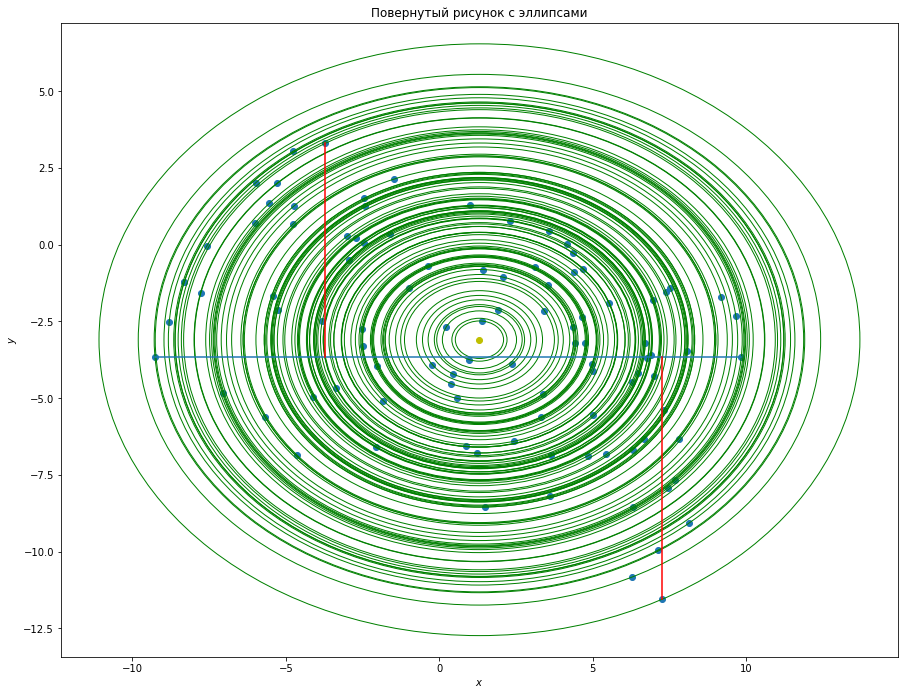

In [125]:
_= fifth_pic(rdata, index_max, v_index, segments, r_centr, myellipse_list, size =15, 
          title = "Повернутый рисунок с эллипсами")

### Эллипсы Петунина на изначальном наборе данных

Для этого изменим параметры эллипсов - поменяем угол на нужный.

In [126]:
centr = rotate_point(r_centr,data[:,index_max[0]], angle)
for ell in myellipse_list:
    ell.angle = np.degrees(angle)
    ell.xy = centr

Для наглядности выведем насколько эллипсов

In [127]:
print(*myellipse_list[:5], sep="\n")

MyEllipse xy: [[0.34743612]
 [0.76521356]], width: 6.417447865306832, height: 4.9909662266387835, angle: 21.665151804932602, count: 17
MyEllipse xy: [[0.34743612]
 [0.76521356]], width: 17.34905820383197, height: 13.492678924190358, angle: 21.665151804932602, count: 83
MyEllipse xy: [[0.34743612]
 [0.76521356]], width: 17.453847423298328, height: 13.574175410994682, angle: 21.665151804932602, count: 84
MyEllipse xy: [[0.34743612]
 [0.76521356]], width: 13.59778338678328, height: 10.575244094692847, angle: 21.665151804932602, count: 67
MyEllipse xy: [[0.34743612]
 [0.76521356]], width: 19.82968607809655, height: 15.421908456111352, angle: 21.665151804932602, count: 92


Изменим угол наклона перпендикуляров.

In [128]:
segments_r = []
for seg in segments:
    segments_r.append(rotate_point(seg,data[:,index_max[0]], angle))

### Рисунок результата

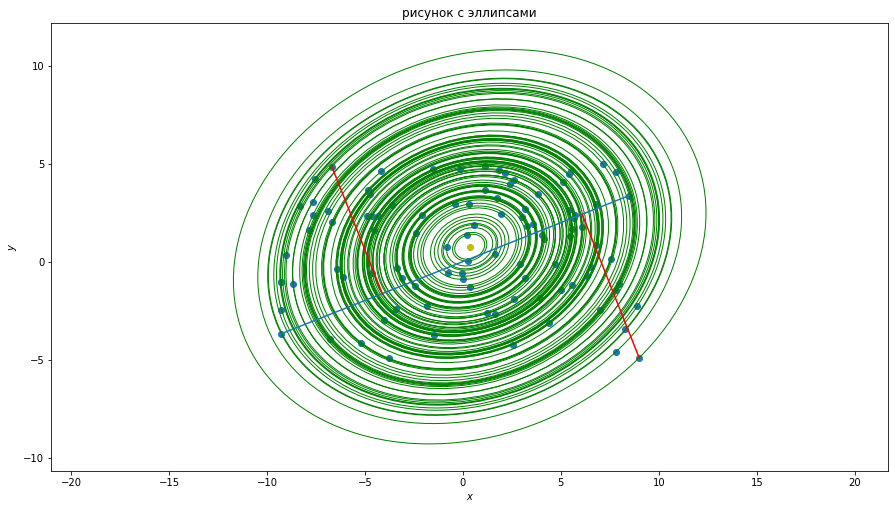

In [129]:
_= fifth_pic(data, index_max, v_index, segments_r, centr, myellipse_list, size = 15,
          title = "рисунок с эллипсами")